In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as scipy
import statsmodels.stats.multitest as multi
 

%config Completer.use_jedi = False

In [9]:
df_size = pd.DataFrame([['S_lycopersicum', 37658], ['S_pimpinellifolium', 25744], ['S_peruvianum', 52929], ['S_chilense', 25885], ['S_pennellii', 38023]], columns=['species', 'proteome_size'])

In [10]:
slyc = ['slyc', 99.4, 69.8, 29.6, 0.2, 0.4]
spim = ['spim', 89.6, 85.2, 4.4, 2.0, 8.4]
sper = ['sper', 95.5, 77.6, 17.9, 0.2, 4.3]
schi = ['schi', 87.9, 85.8, 2.1, 0.5, 11.6]
spen = ['spen', 98.8, 69.7, 29.1, 0.1, 1.1]

df_busco = pd.DataFrame([schi, slyc, spen, spim, sper], columns=['species', 'complete', 'single', 'duplicated', 'fragmented', 'missing'])
df_busco.set_index('species', inplace=True)

In [11]:
df_busco

,complete,single,duplicated,fragmented,missing
species,,,,,
schi,87.9,85.8,2.1,0.5,11.6
slyc,99.4,69.8,29.6,0.2,0.4
spen,98.8,69.7,29.1,0.1,1.1
spim,89.6,85.2,4.4,2.0,8.4
sper,95.5,77.6,17.9,0.2,4.3


In [12]:
new = []

for species in df_busco.index:
    for category in df_busco.columns:
        value = df_busco.loc[species, category]
        new.append([species, category, value])
        
df_busco_sep = pd.DataFrame(new, columns=['species', 'category', 'fraction'])

In [13]:
df_busco_sep['species'] = pd.Categorical(df_busco_sep['species'], ['slyc', 'spim', 'sper', 'schi', 'spen'])
df_busco_sep.sort_values(by='species', inplace=True)

In [15]:
categories = ['single', 'duplicated', 'fragmented', 'missing']

for spec in np.unique(df_busco_sep.species.to_numpy()):

    print(spec, np.sum(df_busco_sep[(df_busco_sep.species == spec) & (df_busco_sep.category.isin(categories))].fraction.to_numpy()))

schi 100.0
slyc 100.00000000000001
spen 100.0
sper 100.0
spim 100.0


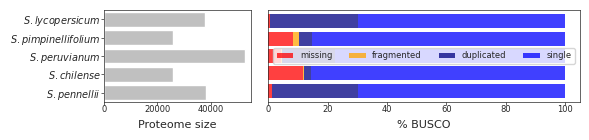

In [20]:
sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6, 1.5))

sizes = plt.subplot2grid((1, 3), (0, 0))
busco = plt.subplot2grid((1, 3), (0, 1), colspan=2)

axes = [sizes, busco]
annotate_axes(axes)

### Define some arrays ###
species_order=['slyc', 'spim', 'sper', 'schi', 'spen'],
species_labels = ['$\itS.lycopersicum$', '$\itS.pimpinellifolium$', '$\itS.peruvianum$', '$\itS.chilense$', '$\itS.pennellii$']

### Generate individual plots ###

# Proteome sizes

sizes.set_xlim(0, 55000)
sns.barplot(data=df_size, x='proteome_size', y='species', color='silver', ax=sizes)

#sizes.axvline(37658, lw=0.5, ls='--', color='black')

sizes.set_xlabel('Proteome size', fontsize=8)
sizes.tick_params(axis='x', labelsize=6)
sizes.set_ylabel('')
sizes.set_yticklabels(species_labels, size=7)

#handles, labels = sper.get_legend_handles_labels()
#sper.legend(handles[:2], ['Mock', 'BTH'], ncol=1, loc=2, prop={"size":5.5}, markerscale=0.5)


# BUSCO analysis

sns.histplot(data=df_busco_sep[df_busco_sep.category.isin(categories)], y='species', weights='fraction', hue='category', multiple='stack', palette=['blue', 'navy', 'orange', 'red'], edgecolor='black', linewidth=0, shrink=0.8, ax=busco)

#handles, labels = busco.get_legend_handles_labels()

busco.legend(['missing', 'fragmented', 'duplicated', 'single'], ncol=4, loc=10, prop={"size":6}, markerscale=0.5)

busco.set_xlabel('% BUSCO', fontsize=8)
busco.tick_params(axis='x', labelsize=6)
busco.set_ylabel('')
busco.set_yticklabels('')
busco.yaxis.set_tick_params(which='major', width=0, length=0)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/2_Speruvianum_proteome/Figure5_jupyter.svg', transparent=True)
plt.show()